In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import Hofstader as hof
import sympy as sp
reload(hof) 

<module 'Hofstader' from '/Users/gordonwongyl/Documents/FYP/Numerical/Hofstader.py'>

In [2]:
# Exact computation of geometric tensor for [-pi/q/a, pi/q/a] x [-pi/q/a, pi/q/a]
def partial_H_1(k1, k2, a, p, q, t=1):
    M = np.zeros((q,q), dtype=np.complex256)
    for i in range(q):
        M[i,i] = 2*t*a*np.sin(k1*a + 2*np.pi*p/q * (i+1))
    return M

def partial_H_2(k1, k2, a, p, q, t=1):
    M = np.zeros((q,q), dtype=np.complex256)
    for i in range(q):
        M[(i+1)%q,i] = -t*1j*a*np.exp(1j*k2*a)  
        M[i,(i+1)%q] = t*1j*a*np.exp(-1j*k2*a)

    return M

def geometric_tensor(eigvecs, eigvals, n, N1=100, N2=100, a=1, p=1, t=1):
    n1, n2, q = eigvals.shape

    k1_list = np.arange(-1/q, 1/q+1/N1, 2/N1)*np.pi/a
    k2_list = np.arange(-1/q, 1/q+1/N2, 2/N2)*np.pi/a
    Q = np.zeros((2,2, n1, n2), dtype=np.complex256)
    for i in range(n1):
        for j in range(n2):
            k1, k2 = k1_list[i], k2_list[j]
            H1_k = partial_H_1(k1, k2, a, p, q, t) 
            H2_k = partial_H_2(k1, k2, a, p, q, t) 
            phi_n = eigvecs[i, j, :, n]
            for m in range(q):
                if m==n:
                    continue
                phi_m = eigvecs[i, j, :, m]
                e_diff = eigvals[i,j,m] - eigvals[i,j,n]
                
                # Rearrange division to increase precision
                Q[0,0,i,j] += (np.inner(phi_n.conj(), np.dot(H1_k, phi_m))/e_diff)*(np.inner(phi_m.conj(), np.dot(H1_k, phi_n))/e_diff)
                Q[0,1,i,j] += (np.inner(phi_n.conj(), np.dot(H1_k, phi_m))/e_diff)*(np.inner(phi_m.conj(), np.dot(H2_k, phi_n))/e_diff)
                Q[1,0,i,j] += (np.inner(phi_n.conj(), np.dot(H2_k, phi_m))/e_diff)*(np.inner(phi_m.conj(), np.dot(H1_k, phi_n))/e_diff)
                Q[1,1,i,j] += (np.inner(phi_n.conj(), np.dot(H2_k, phi_m))/e_diff)*(np.inner(phi_m.conj(), np.dot(H2_k, phi_n))/e_diff)
                
                # Q[0,0,i,j] += np.inner(phi_n.conj(), np.dot(H1_k, phi_m))*np.inner(phi_m.conj(), np.dot(H1_k, phi_n))/e_diff**2
                # Q[0,1,i,j] += np.inner(phi_n.conj(), np.dot(H1_k, phi_m))*np.inner(phi_m.conj(), np.dot(H2_k, phi_n))/e_diff**2
                # Q[1,0,i,j] += np.inner(phi_n.conj(), np.dot(H2_k, phi_m))*np.inner(phi_m.conj(), np.dot(H1_k, phi_n))/e_diff**2
                # Q[1,1,i,j] += np.inner(phi_n.conj(), np.dot(H2_k, phi_m))*np.inner(phi_m.conj(), np.dot(H2_k, phi_n))/e_diff**2

            
                # Using log to turn multiplication into addition
                # Q[0,0,i,j] += np.exp(np.log(np.inner(phi_n.conj(), np.dot(H1_k, phi_m)))+np.log(np.inner(phi_m.conj(), np.dot(H1_k, phi_n))) - 2*np.log(e_diff))
                # Q[0,1,i,j] += np.exp(np.log(np.inner(phi_n.conj(), np.dot(H1_k, phi_m)))+np.log(np.inner(phi_m.conj(), np.dot(H2_k, phi_n))) - 2*np.log(e_diff))
                # Q[1,0,i,j] += np.exp(np.log(np.inner(phi_n.conj(), np.dot(H2_k, phi_m)))+np.log(np.inner(phi_m.conj(), np.dot(H1_k, phi_n))) - 2*np.log(e_diff))
                # Q[1,1,i,j] += np.exp(np.log(np.inner(phi_n.conj(), np.dot(H2_k, phi_m)))+np.log(np.inner(phi_m.conj(), np.dot(H2_k, phi_n))) - 2*np.log(e_diff))
    return Q


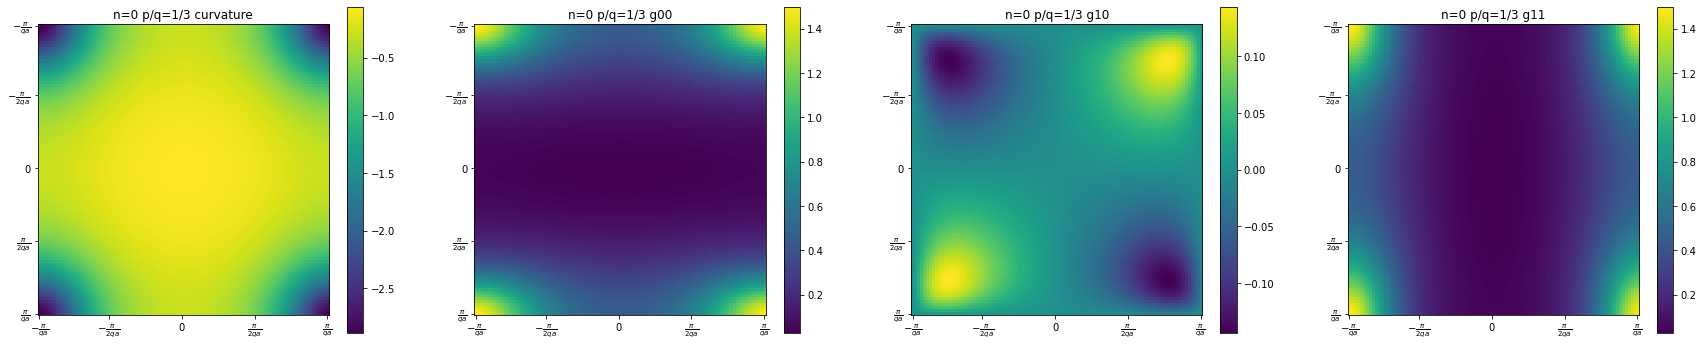

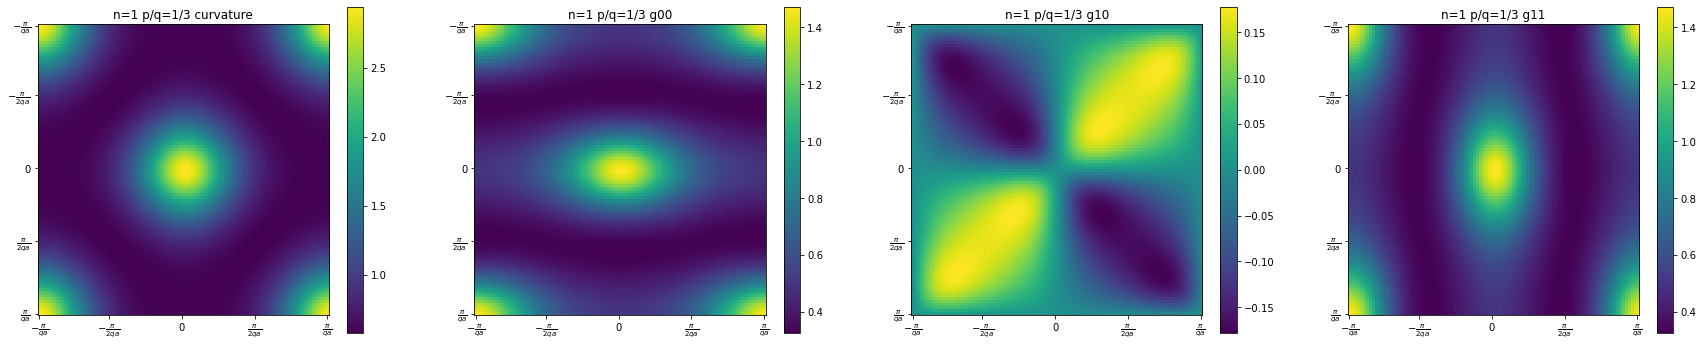

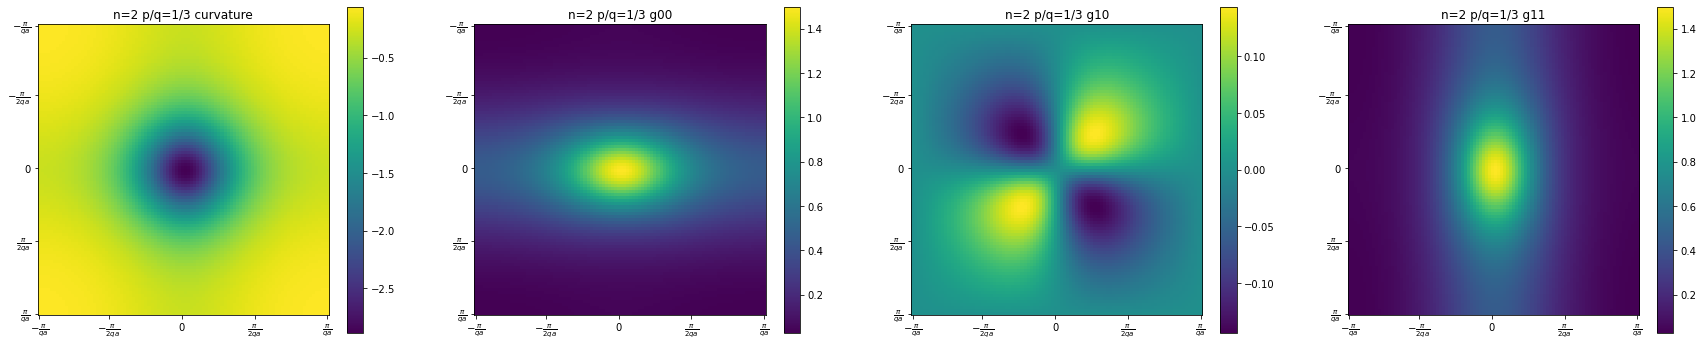

In [22]:
# Output comparison
p = 1
q = 3
N = 288

positions = [0, 23, 47, 71, 95]
ticks = ["$-\\frac{\pi}{qa}$", "$-\\frac{\pi}{2qa}$", 0, "$\\frac{\pi}{2qa}$", "$\\frac{\pi}{qa}$" ]

# hof.diagonalize(p, q, N, N, a=1, t=1, file="Test")
eigvec = np.load(f"Test/{N}_by_{N}_p_{p}_q_{q}_eigenvectors.npy")
eigval = np.load(f"Test/{N}_by_{N}_p_{p}_q_{q}_eigenvalues.npy")
for n in range(q):
    Q = geometric_tensor(eigvec, eigval, n, p=p, N1=N, N2=N)
    F = 2*Q.imag
    g = Q.real
    fig, ax = plt.subplots(1,4, figsize=(30,60))
    im = ax[0].imshow(F[0, 1, :-1,:-1])
    plt.colorbar(im, ax=ax[0], shrink=0.1)
    im = ax[1].imshow(g[0,0,:-1,:-1])
    plt.colorbar(im, ax=ax[1], shrink=0.1)
    im = ax[2].imshow(g[1,0,:-1,:-1])
    plt.colorbar(im, ax=ax[2], shrink=0.1)
    im = ax[3].imshow(g[1,1,:-1,:-1])
    plt.colorbar(im, ax=ax[3], shrink=0.1)
    
    ax[0].set_xticks(positions)
    ax[0].set_xticklabels(ticks)
    
    ax[0].set_yticks(positions)
    ax[0].set_yticklabels(ticks)
    
    ax[1].set_xticks(positions)
    ax[1].set_xticklabels(ticks)
    
    ax[1].set_yticks(positions)
    ax[1].set_yticklabels(ticks)
    
    ax[2].set_xticks(positions)
    ax[2].set_xticklabels(ticks)
    
    ax[2].set_yticks(positions)
    ax[2].set_yticklabels(ticks)
    
    ax[3].set_xticks(positions)
    ax[3].set_xticklabels(ticks)
    
    ax[3].set_yticks(positions)
    ax[3].set_yticklabels(ticks)
    
    ax[0].set(title=f"n={n} p/q={p}/{q} curvature")
    ax[1].set(title=f"n={n} p/q={p}/{q} g00")
    ax[2].set(title=f"n={n} p/q={p}/{q} g10")
    ax[3].set(title=f"n={n} p/q={p}/{q} g11")

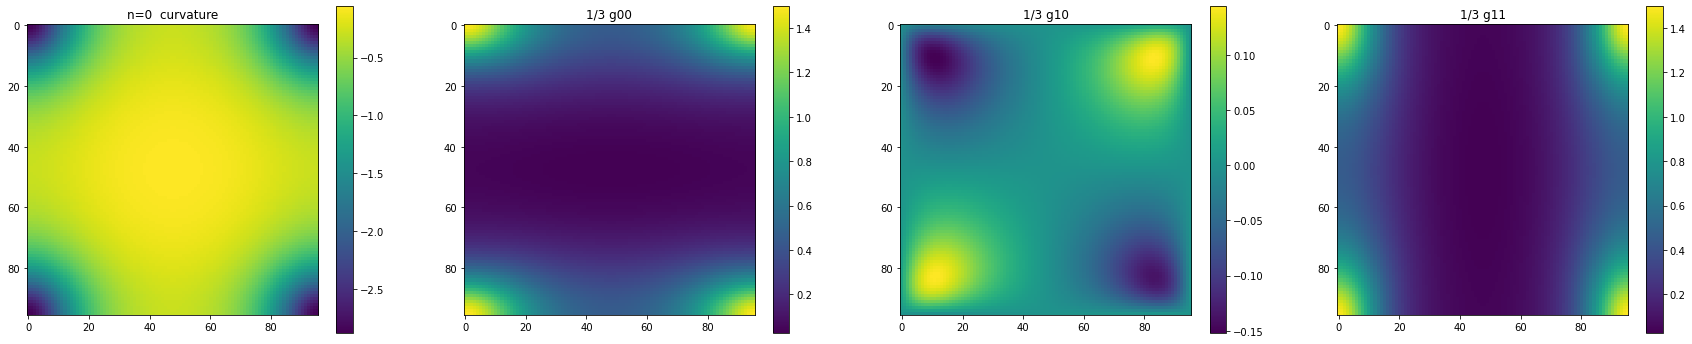

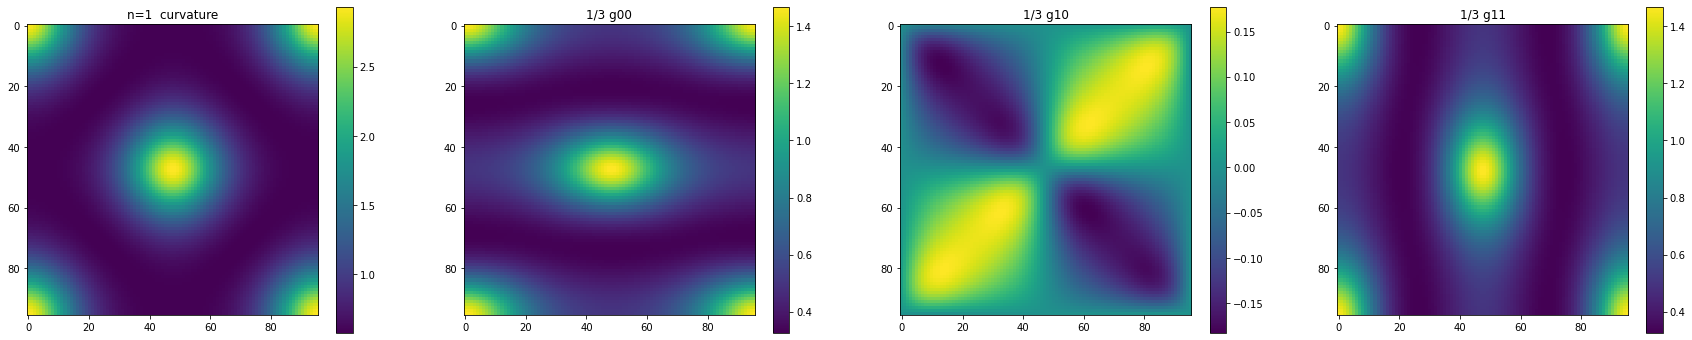

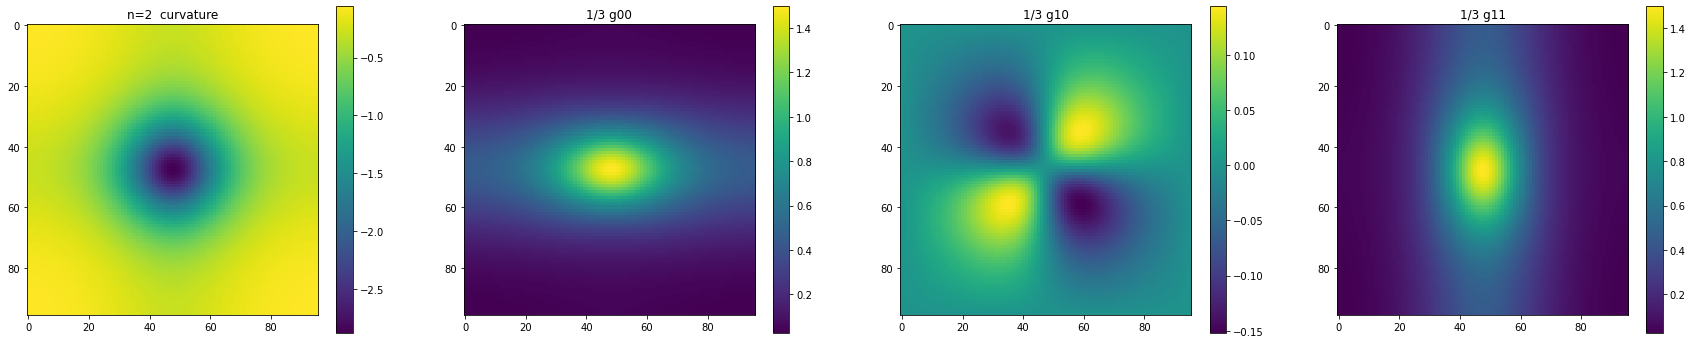

In [97]:
for n in range(q):
    BZ0 = eigvec[:,:,:,n]
    n1, n2, _ = BZ0.shape
    dk1, dk2 = 2*np.pi/N, 2*np.pi/N
    # dk1, dk2, = 1,1
    g = hof.FSM(BZ0)/dk1/dk2
    F = hof.curvature(BZ0)/dk1/dk2

    fig, ax = plt.subplots(1,4, figsize=(30,60))
    im = ax[0].imshow(F.imag[:-1,:-1])
    plt.colorbar(im, ax=ax[0], shrink=0.1)
    im = ax[1].imshow(g[0,0,:-1,:-1])
    plt.colorbar(im, ax=ax[1], shrink=0.1)
    im = ax[2].imshow(g[0,1,:-1,:-1])
    plt.colorbar(im, ax=ax[2], shrink=0.1)
    im = ax[3].imshow(g[1,1,:-1,:-1])
    plt.colorbar(im, ax=ax[3], shrink=0.1)
    ax[0].set(title=f"n={n}  curvature")
    ax[1].set(title=f"{p}/{q} g00")
    ax[2].set(title=f"{p}/{q} g10")
    ax[3].set(title=f"{p}/{q} g11")

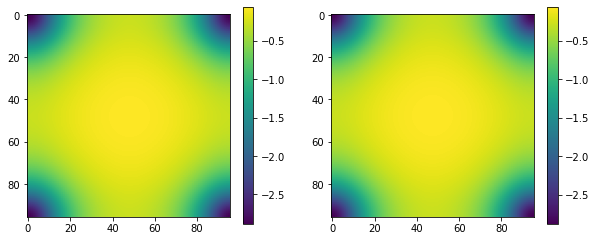

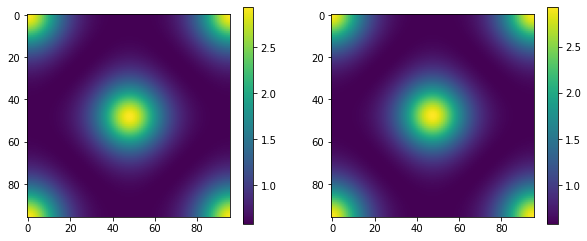

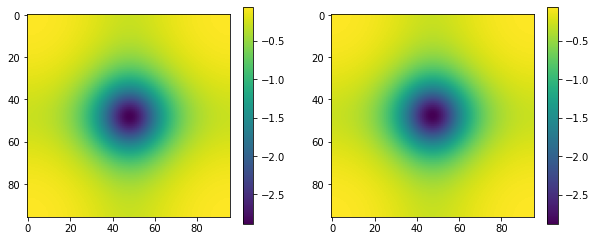

In [98]:
for n in range(q):
    Q = geometric_tensor(eigvec, eigval, n, p=p, N1=N, N2=N)
    # np.save("Low_B_regime"+f"/{N*q}_by_{N*q}_p_{p}_q_{q}_Q.npy", Q)
    F1 = Q.imag
    
    BZ0 = eigvec[:,:,:,n]
    n1, n2, _ = BZ0.shape
    dk1, dk2 = 2*np.pi/N, 2*np.pi/N
    F2 = hof.curvature(BZ0)/dk1/dk2
    fig, ax = plt.subplots(1,2, figsize=(10,20))
    im = ax[0].imshow(2*F1[0, 1, :-1,:-1])
    plt.colorbar(im, ax=ax[0], shrink=0.2)
    im = ax[1].imshow(F2.imag[:-1,:-1])
    plt.colorbar(im, ax=ax[1], shrink=0.2)

/Users/gordonwongyl/opt/anaconda3/envs/fyp/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Casting input data from float128 to float64 for imshow.
  func(*args, **kwargs)
/Users/gordonwongyl/opt/anaconda3/envs/fyp/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Casting input data from float128 to float64 for imshow.
  fig.canvas.print_figure(bytes_io, **kw)


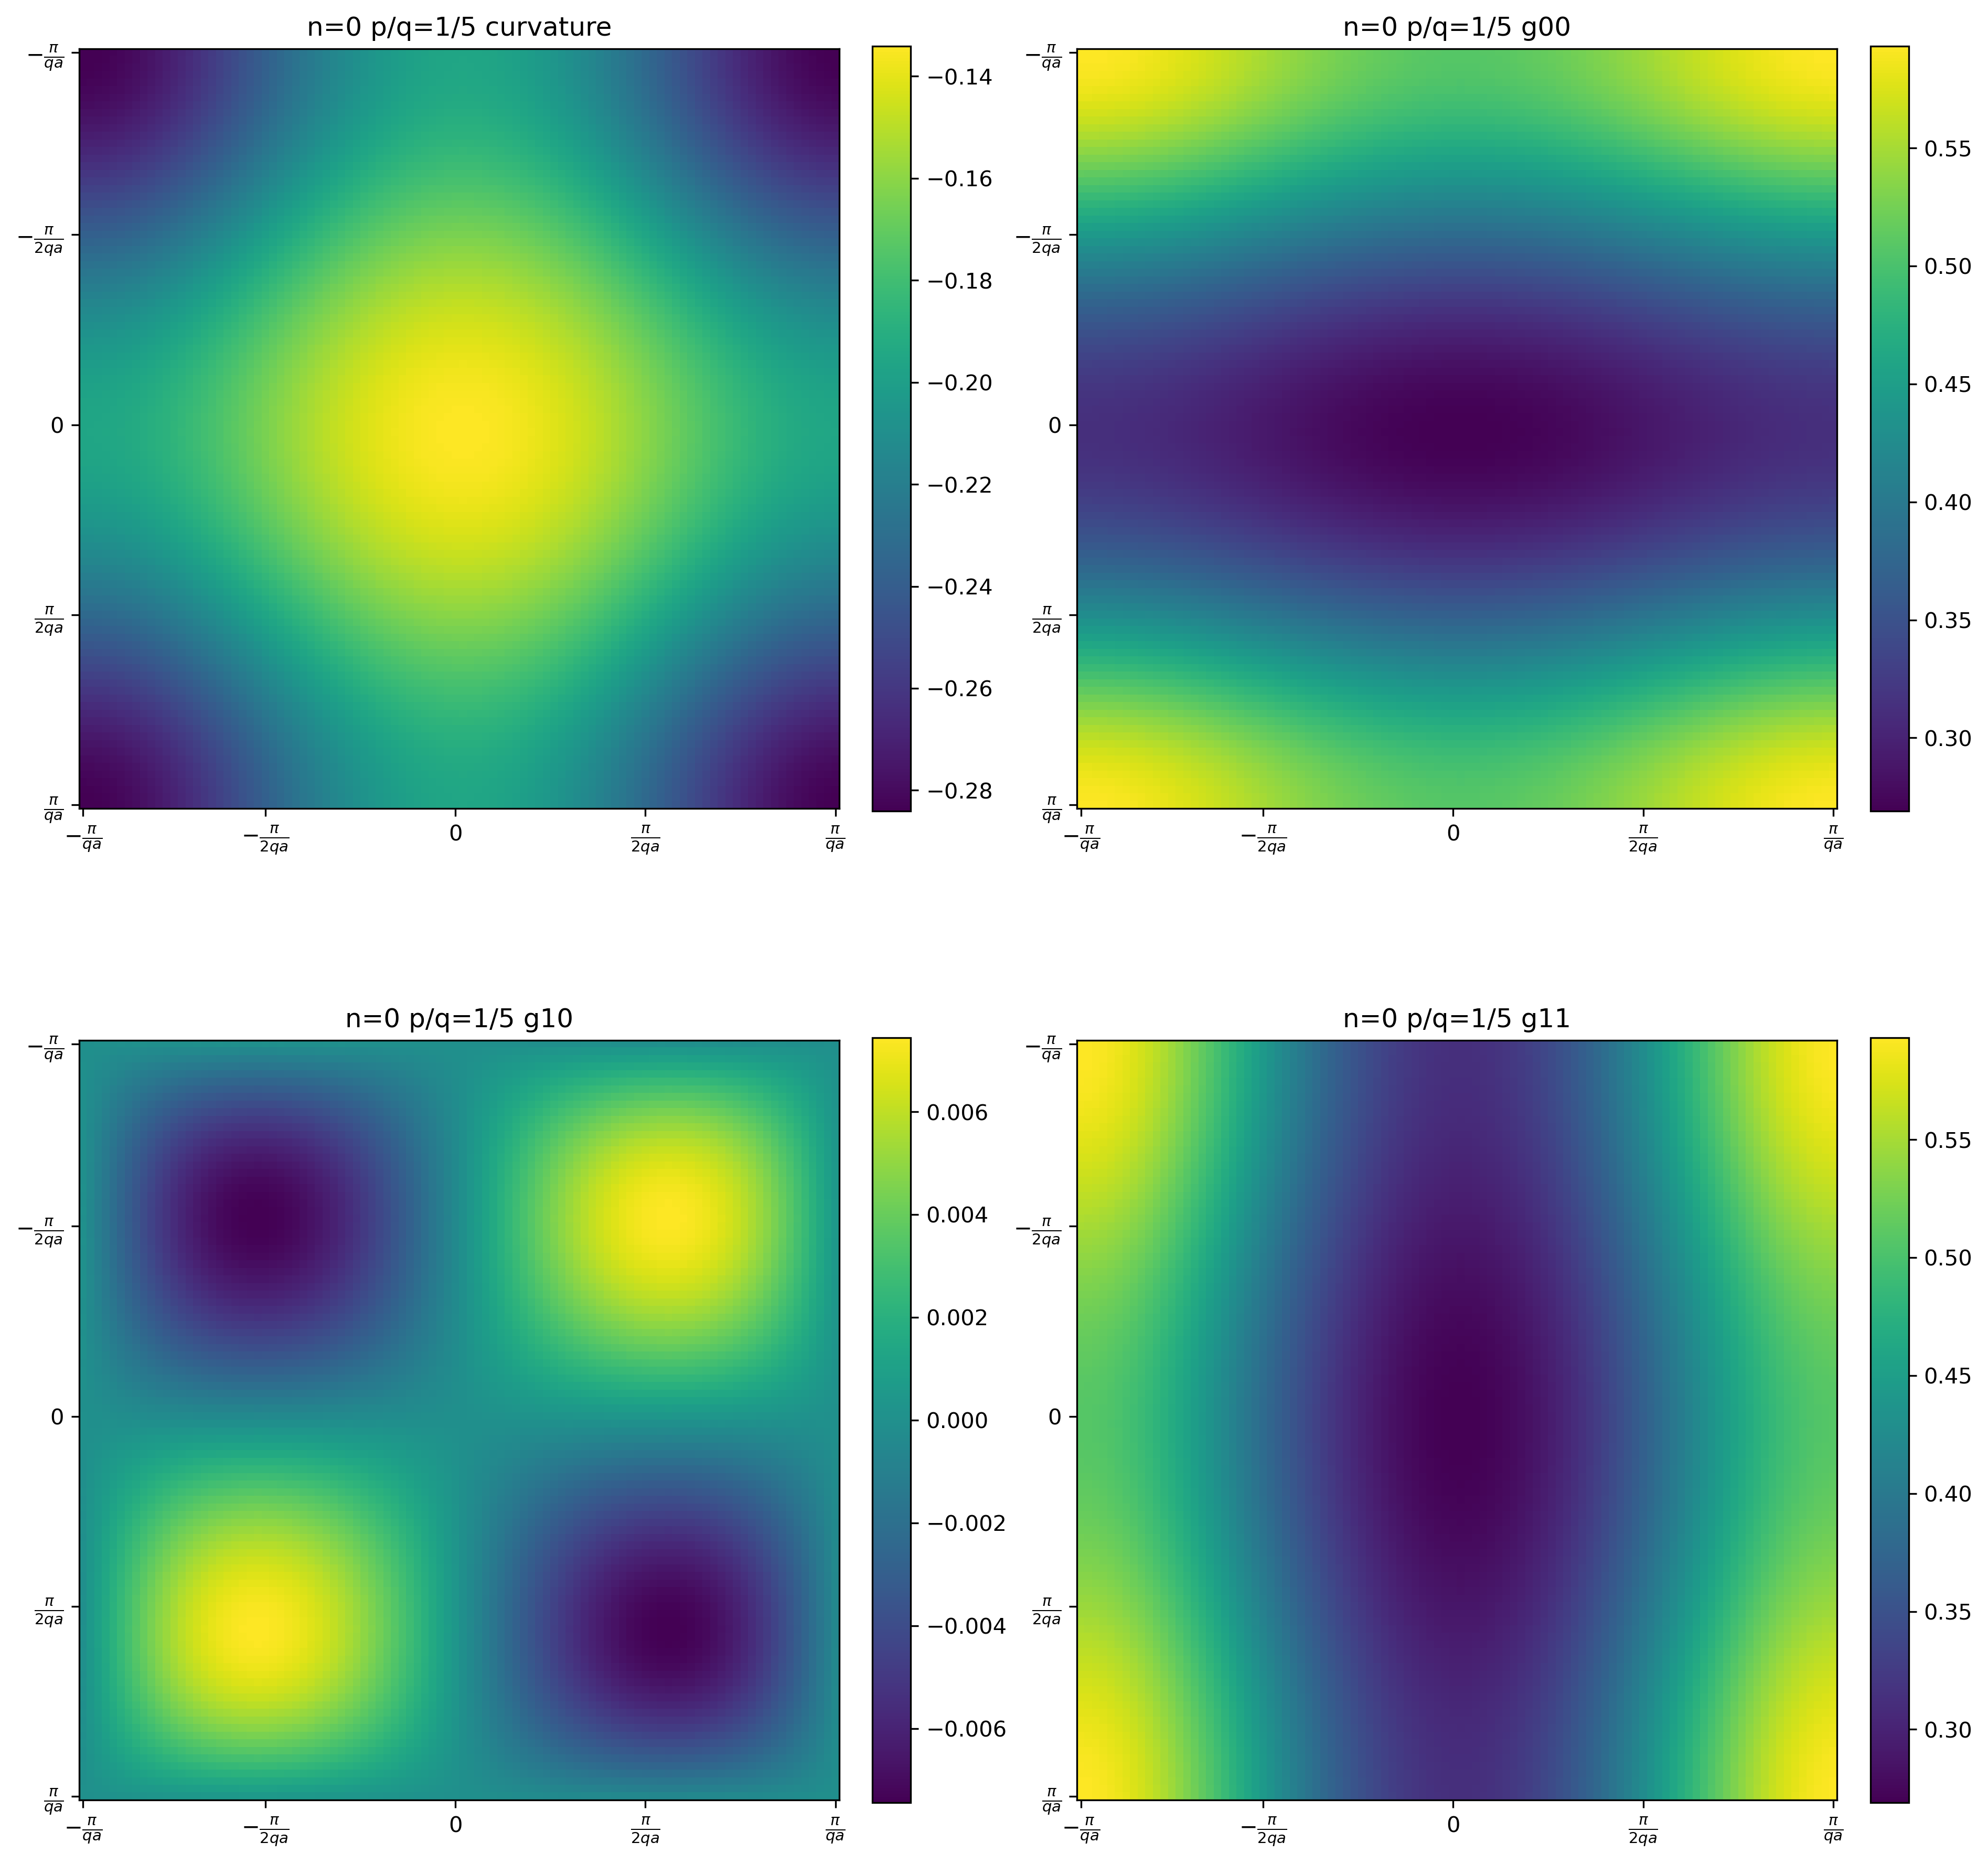

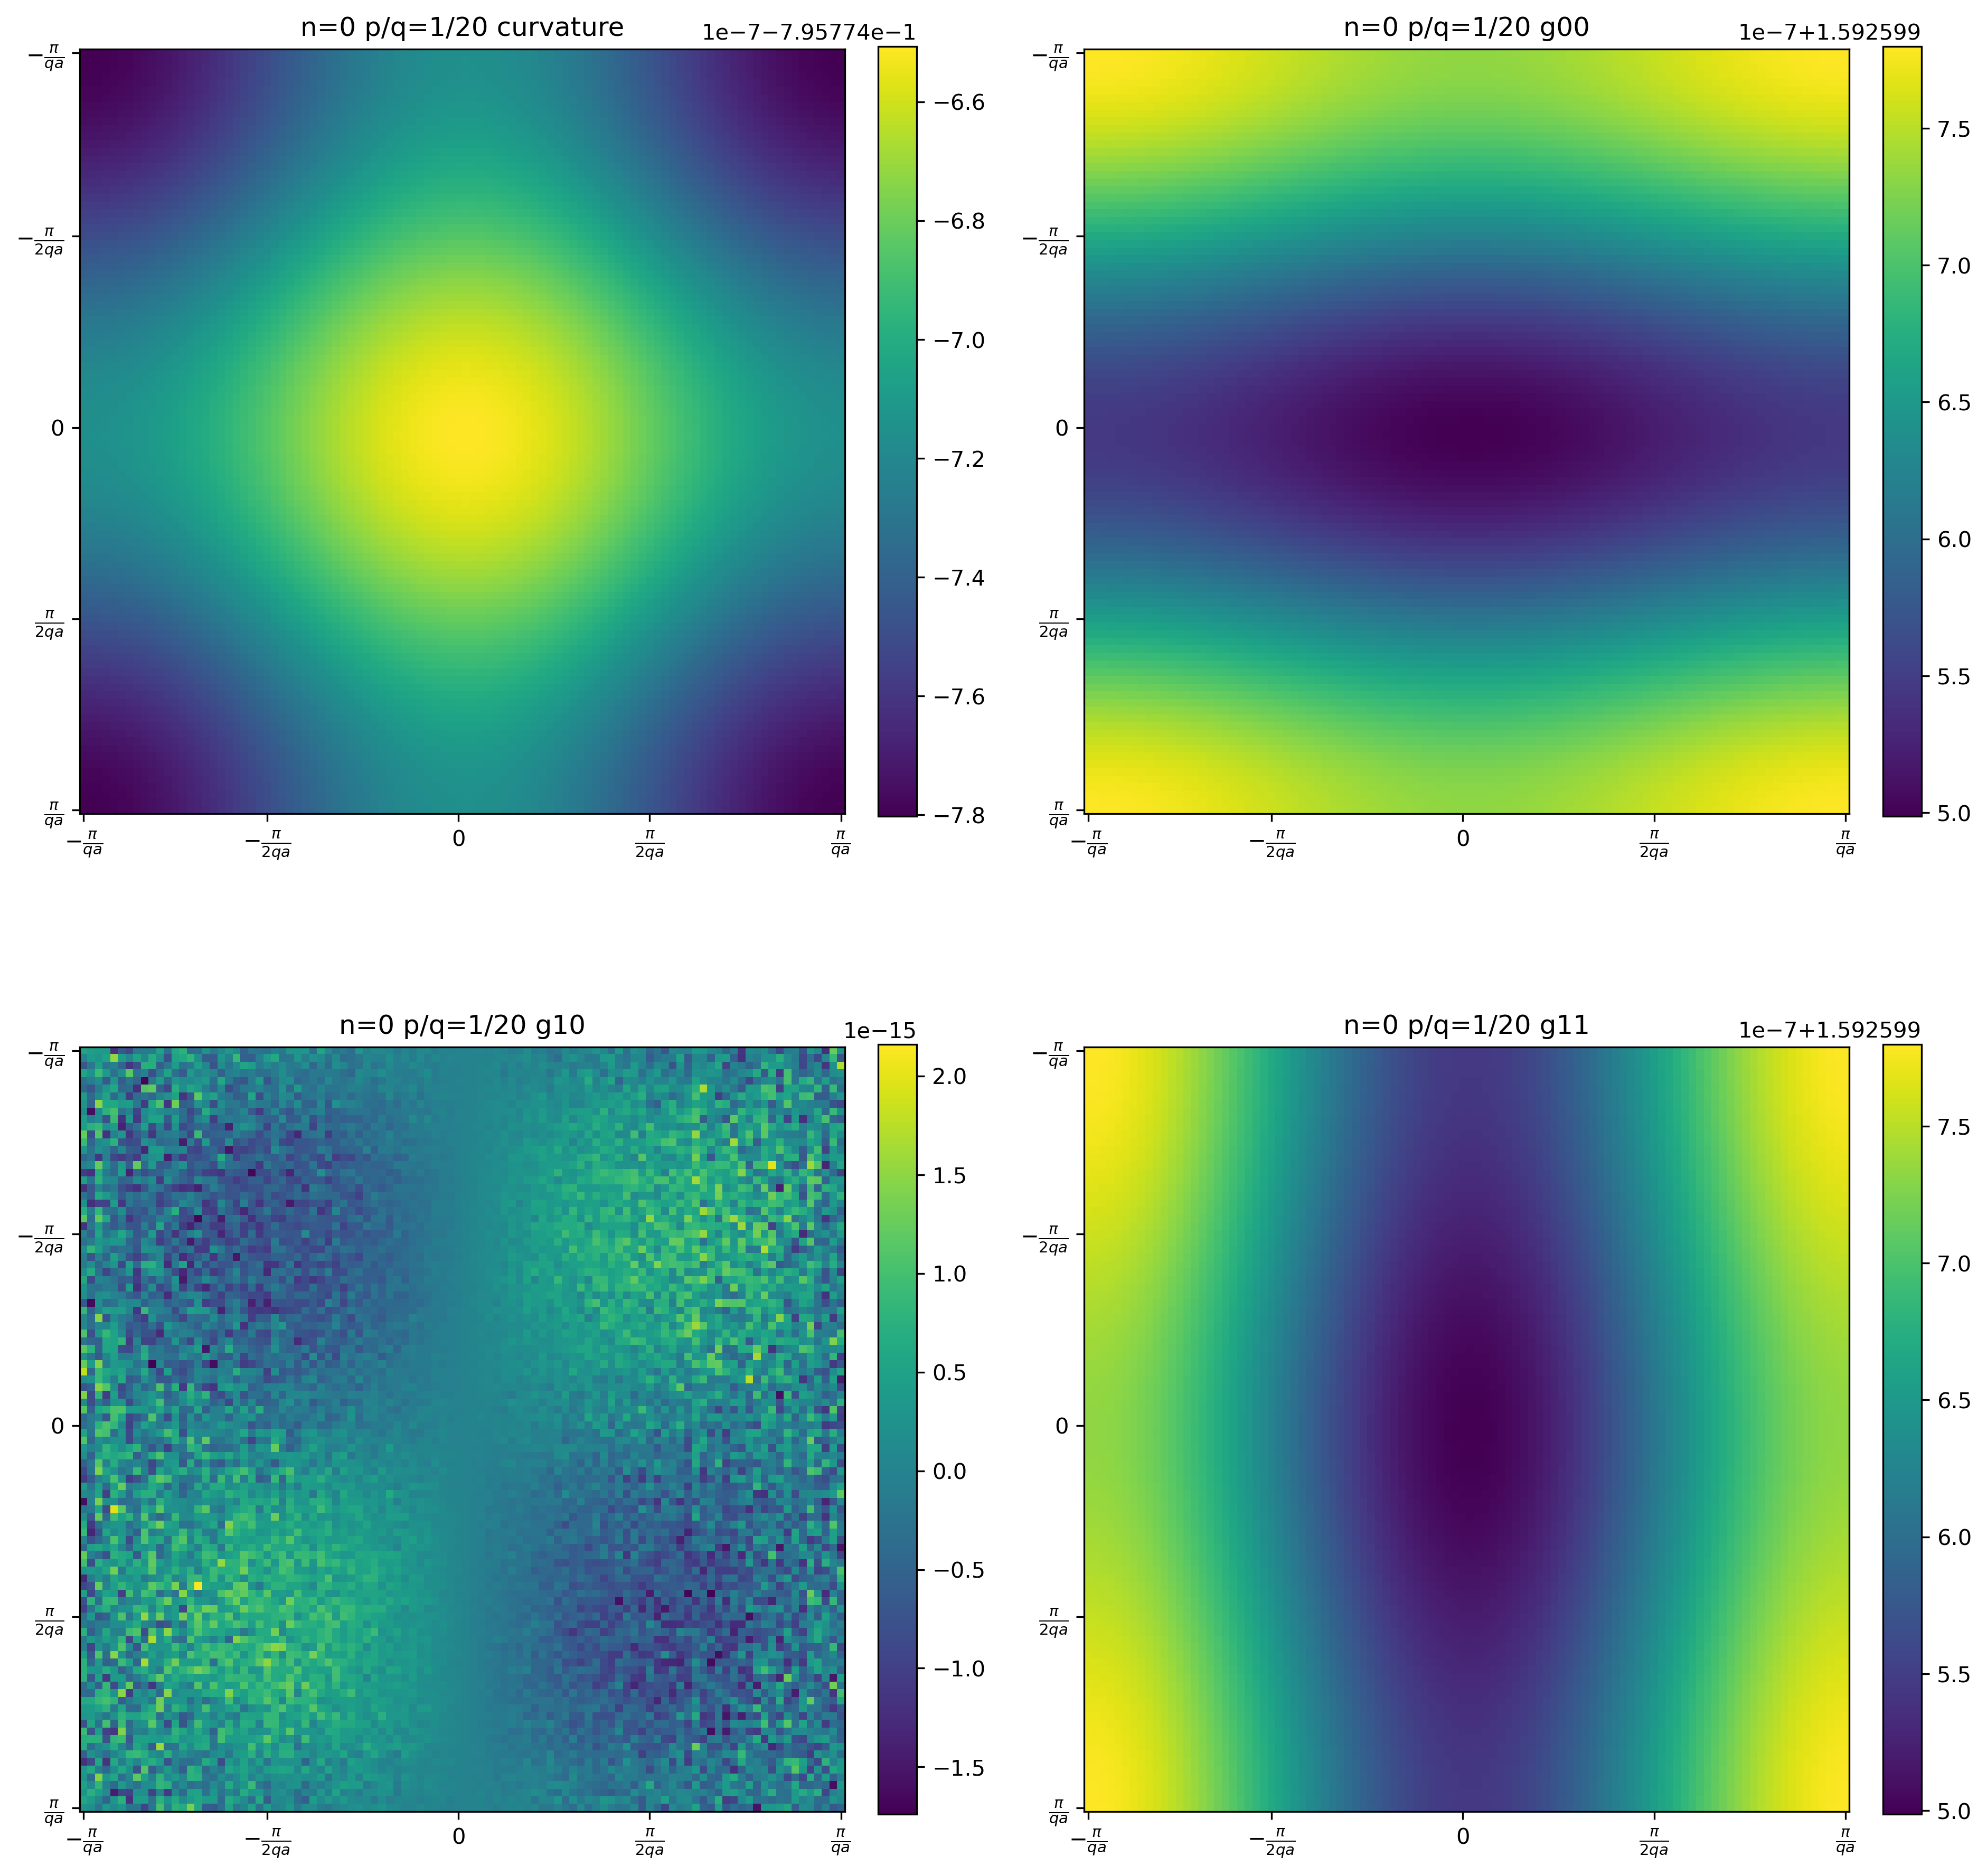

In [18]:
# Load eigenvectors and eigenvalues
# q_list = np.arange(3,21,1)
q_list = [5,20]

# q_list = np.arange(10,31,10)
# q_list = np.arange(4,5,1)
N = 100
p = 1
n = 0

positions = [0, 24, 49, 74, 99]
ticks = ["$-\\frac{\pi}{qa}$", "$-\\frac{\pi}{2qa}$", 0, "$\\frac{\pi}{2qa}$", "$\\frac{\pi}{qa}$" ]

for q in q_list:
    # print(q)
    eigvec = np.load(f"Low_B_regime/{N*q}_by_{N*q}_p_{p}_q_{q}_eigenvectors.npy")
    eigval = np.load(f"Low_B_regime/{N*q}_by_{N*q}_p_{p}_q_{q}_eigenvalues.npy")
    # Q = geometric_tensor(eigvec, eigval, n, p=p, N1=N*q, N2=N*q)
    # np.save("Low_B_regime"+f"/{N*q}_by_{N*q}_p_{p}_q_{q}_Q_{n}.npy", Q)
    Q = np.load("Low_B_regime"+f"/{N*q}_by_{N*q}_p_{p}_q_{q}_Q_{n}.npy")
    F = Q.imag/2
    # print(np.min(F))
    g = Q.real
    # print(np.mean(g)) 
    fig, ax = plt.subplots(2,2, figsize=(15,15), dpi=300)
    ax = ax.flatten()
    im1 = ax[0].imshow(F[0, 1, :-1,:-1],vmin=F[0, 1, :-1,:-1].min(), vmax=F[0, 1, :-1,:-1].max())

    im2 = ax[1].imshow(g[0,0,:-1,:-1], vmin=g[0, 0, :-1,:-1].min(), vmax=g[0, 0, :-1,:-1].max())

    im3 = ax[2].imshow(g[1,0,:-1,:-1])

    im4 = ax[3].imshow(g[1,1,:-1,:-1])

    # Add colorbars with consistent sizing
    cbar0 = plt.colorbar(im1, ax=ax[0], fraction=0.046, pad=0.04)
    cbar1 = plt.colorbar(im2, ax=ax[1], fraction=0.046, pad=0.04)
    cbar2 = plt.colorbar(im3, ax=ax[2], fraction=0.046, pad=0.04)
    cbar3 = plt.colorbar(im4, ax=ax[3], fraction=0.046, pad=0.04)

    ax[0].set_xticks(positions)
    ax[0].set_xticklabels(ticks)
    
    ax[0].set_yticks(positions)
    ax[0].set_yticklabels(ticks)
    
    ax[1].set_xticks(positions)
    ax[1].set_xticklabels(ticks)
    
    ax[1].set_yticks(positions)
    ax[1].set_yticklabels(ticks)
    
    ax[2].set_xticks(positions)
    ax[2].set_xticklabels(ticks)
    
    ax[2].set_yticks(positions)
    ax[2].set_yticklabels(ticks)
    
    ax[3].set_xticks(positions)
    ax[3].set_xticklabels(ticks)
    
    ax[3].set_yticks(positions)
    ax[3].set_yticklabels(ticks)
    
    ax[0].set(title=f"n={n} p/q={p}/{q} curvature")
    ax[1].set(title=f"n={n} p/q={p}/{q} g00")
    ax[2].set(title=f"n={n} p/q={p}/{q} g10")
    ax[3].set(title=f"n={n} p/q={p}/{q} g11")

    # plt.savefig(f"Low_B_regime/{N*q}_by_{N*q}_p_{p}_q_{q}_Q_{n}.png", dpi=300)

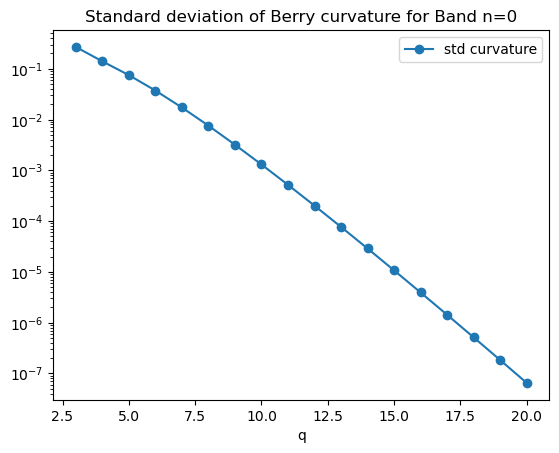

In [10]:
inequality_list = []
min_list = []
q_list = np.arange(3,21,1)
N = 100
p=1
n=0
for q in q_list:
   Q = np.load(f"Low_B_regime/{N*q}_by_{N*q}_p_{p}_q_{q}_Q_{n}.npy")
   _, _, n1, n2 = Q.shape
   detQ = np.zeros((n1, n2), dtype=complex)
   for i in range(n1):
      for j in range(n2):
         # detQ[i,j] = np.linalg.det(Q[:,:,i,j])
         detQ[i,j] = np.real(Q[0,0,i,j]*Q[1,1,i,j]-Q[0,1,i,j]*Q[1,0,i,j])
   min_list.append(np.std(Q.imag[0,1,:,:]))
   inequality_list.append(np.mean(detQ))


plt.title("Standard deviation of Berry curvature for Band n="+str(n))
plt.plot(q_list, min_list, marker='o', label='std curvature')
# plt.plot(q_list, inequality_list, marker='^', label='mean DISM')
plt.yscale('log')
plt.xlabel("q")
plt.legend()
plt.show()